In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import math as math
import matplotlib.pyplot as plt



In [2]:
mpg = data('mpg') # load the dataset and store it in a variable
# data('mpg', show_doc=True) # view the documentation for the dataset

In [3]:
# Exercise 1
# Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [4]:
# 1a - On average, which manufacturer has the best miles per gallon?

#Create a function to create a new column with best mpg using cty and hwy
mpg["avg_mpg"] = (mpg.cty + mpg.hwy) / 2

#Group by manufacturer 
mpg.groupby("manufacturer").avg_mpg.mean().idxmax()


'honda'

In [5]:
# 1b - How many different manufacturers are there?
#Alternative - Use .unique() to get different manufacturers. and len() to give us total 
#len(mpg.manufacturer.unique())

#Use .nunique() to get number of distinct observations
mpg.manufacturer.nunique()

15

In [6]:
# 1c - How many different models are there?

mpg.model.nunique()

38

In [7]:
# 1d - Do automatic or manual cars have better miles per gallon?

automatics = mpg[mpg.trans.str.contains('auto')]

manuals = mpg[mpg.trans.str.contains('manual')]

print(automatics.avg_mpg.mean())
print(manuals.avg_mpg.mean())

print('Manual cars have better miles per gallon')

19.130573248407643
22.227272727272727
Manual cars have better miles per gallon


In [8]:
# Exercise 2 - Joining and Merging 
# Copy the users and roles dataframes from the examples above. What do you think a right join would look like? An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them?
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [9]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [10]:
# 2a What would a right join look like?

pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [11]:
# 2b What would an outer join look like?
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [12]:
# 2c What happens if you drop the foreign keys from the dataframes and try to merge them?

users_drop = users.drop(columns='role_id')
roles_drop = roles.drop(columns='id')

dropped_foreign = pd.merge(users_drop, roles_drop)
dropped_foreign

,id,name


In [13]:
# Exercise 3 - Getting data from SQL databases

In [14]:
from env import host, user, password



In [15]:
# 3a - Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

def get_db_url(user, host, password, db):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return url

#another way to write function:
#def get_db_url(db, user=user, host=host, password=password):
    #return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [16]:
# 3b - Use your function to obtain a connection to the employees database.

pd.read_sql('select * from employees limit 10 offset 50', get_db_url(user, host, password, 'employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27
5,10056,1961-09-01,Brendon,Bernini,F,1990-02-01
6,10057,1954-05-30,Ebbe,Callaway,F,1992-01-15
7,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13
8,10059,1953-09-19,Alejandro,McAlpine,F,1991-06-26
9,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02


In [17]:
# 3c - Once you have successfully run a query:

In [18]:
# 3c - Intentionally make a typo in the database url. What kind of error message do you see?

#pd.read_sql('select * from employees limit 10 offset 50', get_db_url(user, host, password, 'employeees'))

#OperationalError appears

In [19]:
# 3c - Intentionally make an error in your SQL query. What does the error message look like?
# 3b - Use your function to obtain a connection to the employees database.

#pd.read_sql('select * form employees limit 10 offset 50', get_db_url(user, host, password, 'employees'))

#ProgrammingError appears

In [20]:
# 3d - Read the employees and titles tables into two separate dataframes

sql_employees = """
select * from employees
"""
employees=pd.read_sql(sql_employees, get_db_url(user, host, password, 'employees'))
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [21]:
sql_titles = """
select * from titles
"""
titles=pd.read_sql(sql_titles, get_db_url(user, host, password, 'employees'))
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [22]:
#3e. Visualize the number of employees with each title.
employees.info()
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [23]:
# 3f - Join the employees and titles dataframes together.
#Alt solution: 
#all_emp_titles = pd.merge(employees, titles, on='emp_no')

emp_and_titles = employees.merge(titles, on='emp_no')
emp_and_titles

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [24]:
# 3g - Visualize how frequently employees change titles.

title_changes = emp_and_titles.emp_no.value_counts()
title_changes.value_counts()

1    159754
2    137256
3      3014
Name: emp_no, dtype: int64

In [25]:
# 3h - For each title, find the hire date of the employee that was hired most recently with that title.

emp_and_titles.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [26]:
# 3i - Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

sql = """
select emp_no, title, dept_name 
from employees
join dept_emp using (emp_no)
join titles using (emp_no)
join departments using (dept_no);
"""

titles_by_department = pd.read_sql(sql, get_db_url(user, host, password, 'employees'))

all_titles = pd.crosstab(titles_by_department.dept_name, titles_by_department.title)

all_titles


title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


In [27]:
# Exercise 4 - Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [28]:
chipotle_sql = '''
                SELECT *
                FROM orders;
                '''

In [29]:
orders = pd.read_sql(chipotle_sql, get_db_url(user, host, password, 'chipotle'))
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [30]:
# 4a - What is the total price for each order?

orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)

In [31]:
order_totals = orders.groupby('order_id').item_price.sum()
order_totals.sample(10)

order_id
316     12.50
1787    12.95
355     18.50
371     10.68
30      23.36
719     20.50
190     10.08
438     22.46
694     20.47
811     10.88
Name: item_price, dtype: float64

In [32]:
# 4b - What are the most popular 3 items?
top_three = orders.groupby('item_name').quantity.sum().sort_values(ascending=False).head(3)
top_three

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

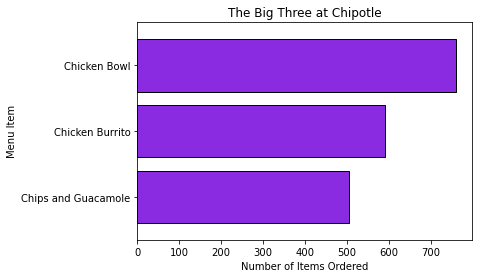

In [33]:
#4 b

top_three.plot(kind='barh',
             color='blueviolet', 
             ec='black', 
             width=.8)

plt.title('The Big Three at Chipotle')
plt.xlabel('Number of Items Ordered')
plt.ylabel('Menu Item')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()

In [34]:
# 4c - Which item has produced the most revenue?

orders.groupby('item_name').item_price.sum().nlargest(1, keep='all')

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

In [35]:
#4c - Alternate using idmax

orders.groupby('item_name').item_price.sum().idxmax()

'Chicken Bowl'